# Model Figures

In [1]:
from os.path import join
import xarray as xr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import ternary

In [3]:
import arviz as az

In [4]:
from matplotlib import style

In [5]:
style.use(join("..", "style.mplstyle"))

## load model results

In [6]:
prior = xr.load_dataset("../model-results/prior.nc")
post = xr.load_dataset("../model-results/posterior.nc")

## define labels

In [7]:
GDGTs = ["G0", "G1", "G2", "G3", "Cren", "Cren regio"]
communities = ["planktonic/autotrophic", "methanotrophic", "benthic"]
locations = ["Astoria Canyon", "Hydrate Ridge", "Mcarthur Canyon"]

## figures

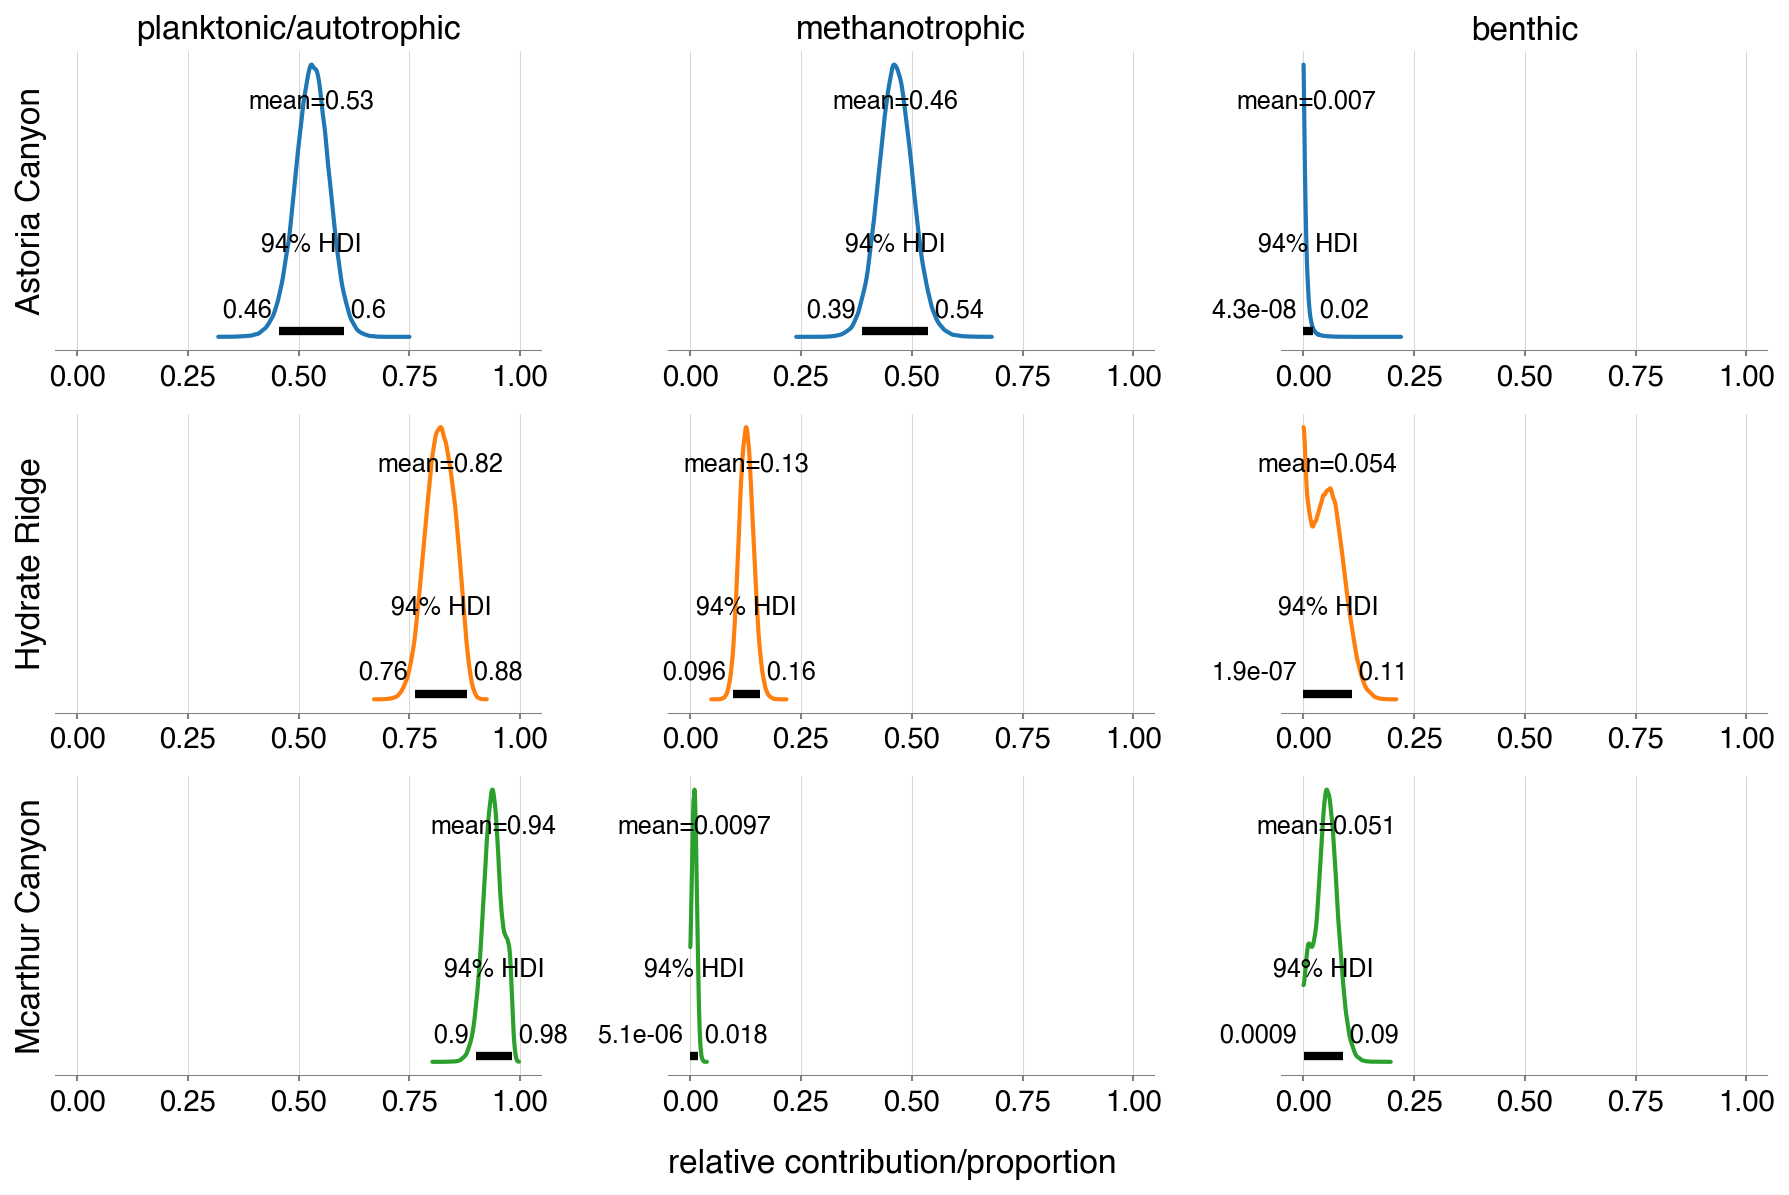

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for i, location in enumerate(locations):
    axs[i, 0].set_ylabel(location, fontsize=16)
for j, com in enumerate(communities):
    for i in range(3):
        az.plot_posterior(post["F"][:, :, i, j], ax=axs[i, j], color=f"C{i}")
    axs[0, j].set_title(com, fontsize=16)
    for i in (1, 2):
        axs[i, j].set_title(None)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()

/Users/markbaum/Library/Caches/pypoetry/virtualenvs/cascadia-margin-lipids-mMstoHi0-py3.11/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


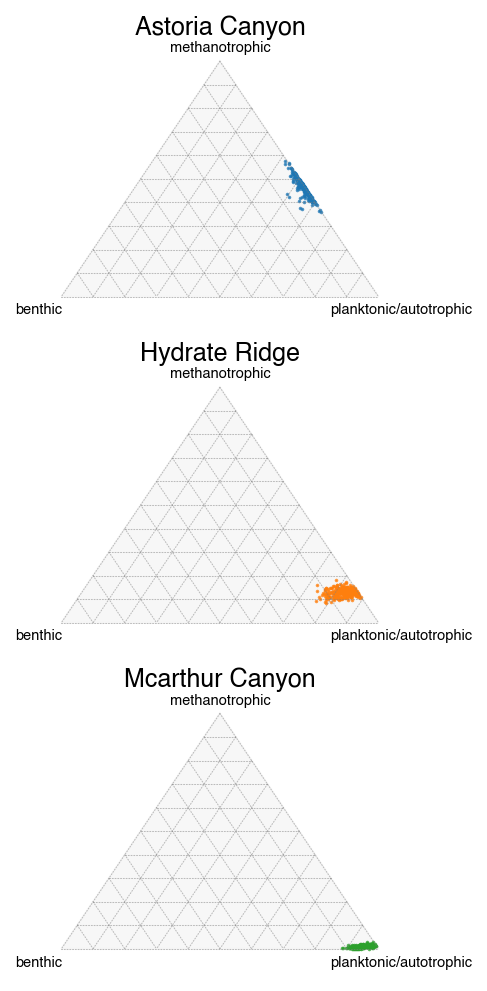

In [9]:
figure, axs = plt.subplots(3, 1, figsize=(3, 8))
for i, location in enumerate(locations):
    ax = axs[i]
    tax = ternary.TernaryAxesSubplot(ax=axs[i])
    ax.axis("off")
    tax.gridlines(color="grey", alpha=0.5, multiple=0.1)
    ax.set_xlabel(location)
    tax.right_corner_label("planktonic/autotrophic", fontsize=7)
    tax.top_corner_label("methanotrophic", fontsize=7, va="top")
    tax.left_corner_label("benthic", fontsize=7)
    tax.set_title(location, va="bottom")
    tax.scatter(
        (post["F"].values[j % 4, j, i, :] for j in range(250)),
        s=0.5,
        alpha=0.75,
        color=f"C{i}",
    )
    ax.annotate(location, (0, 1))
fig.tight_layout()

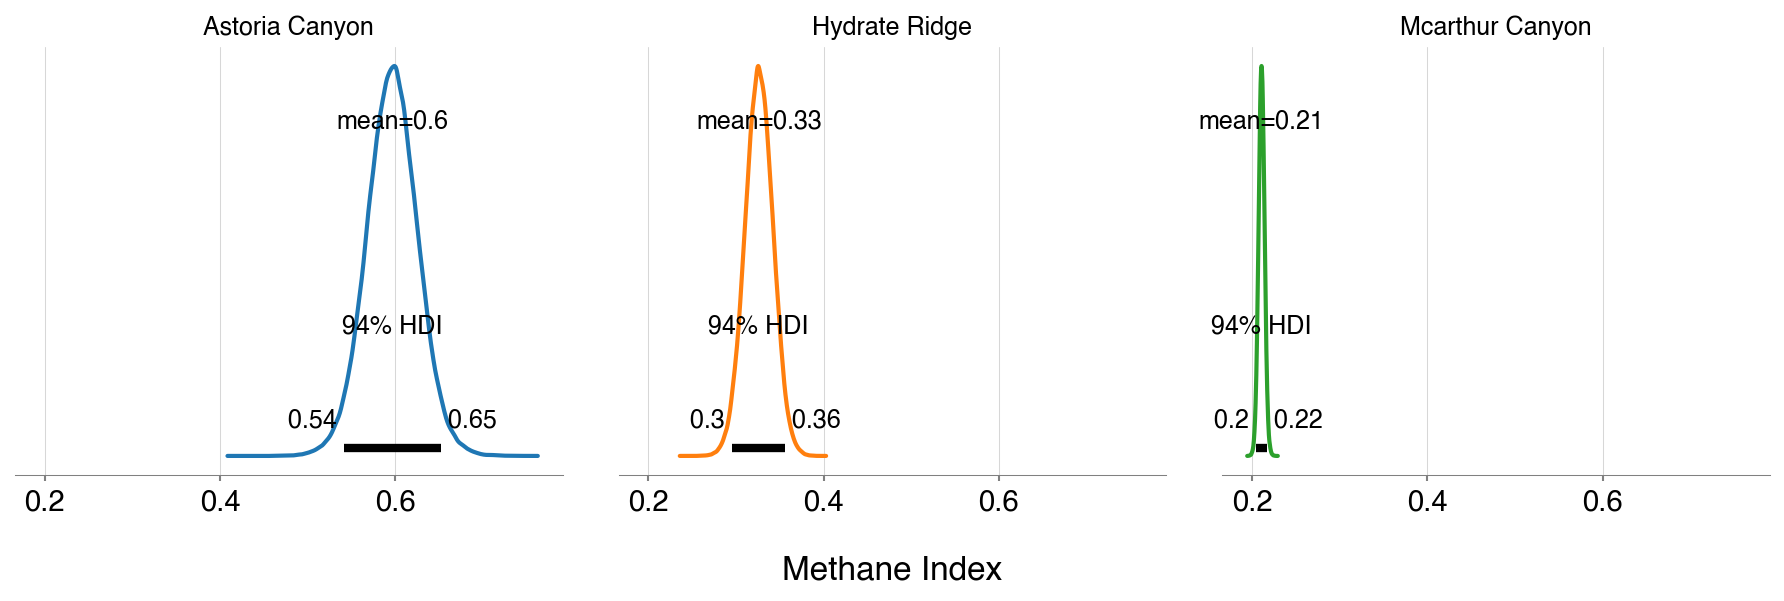

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
for i, ax in enumerate(axs):
    az.plot_posterior(post["Methane Index"][:, :, i], color=f"C{i}", ax=ax)
    ax.set_title(locations[i])
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()

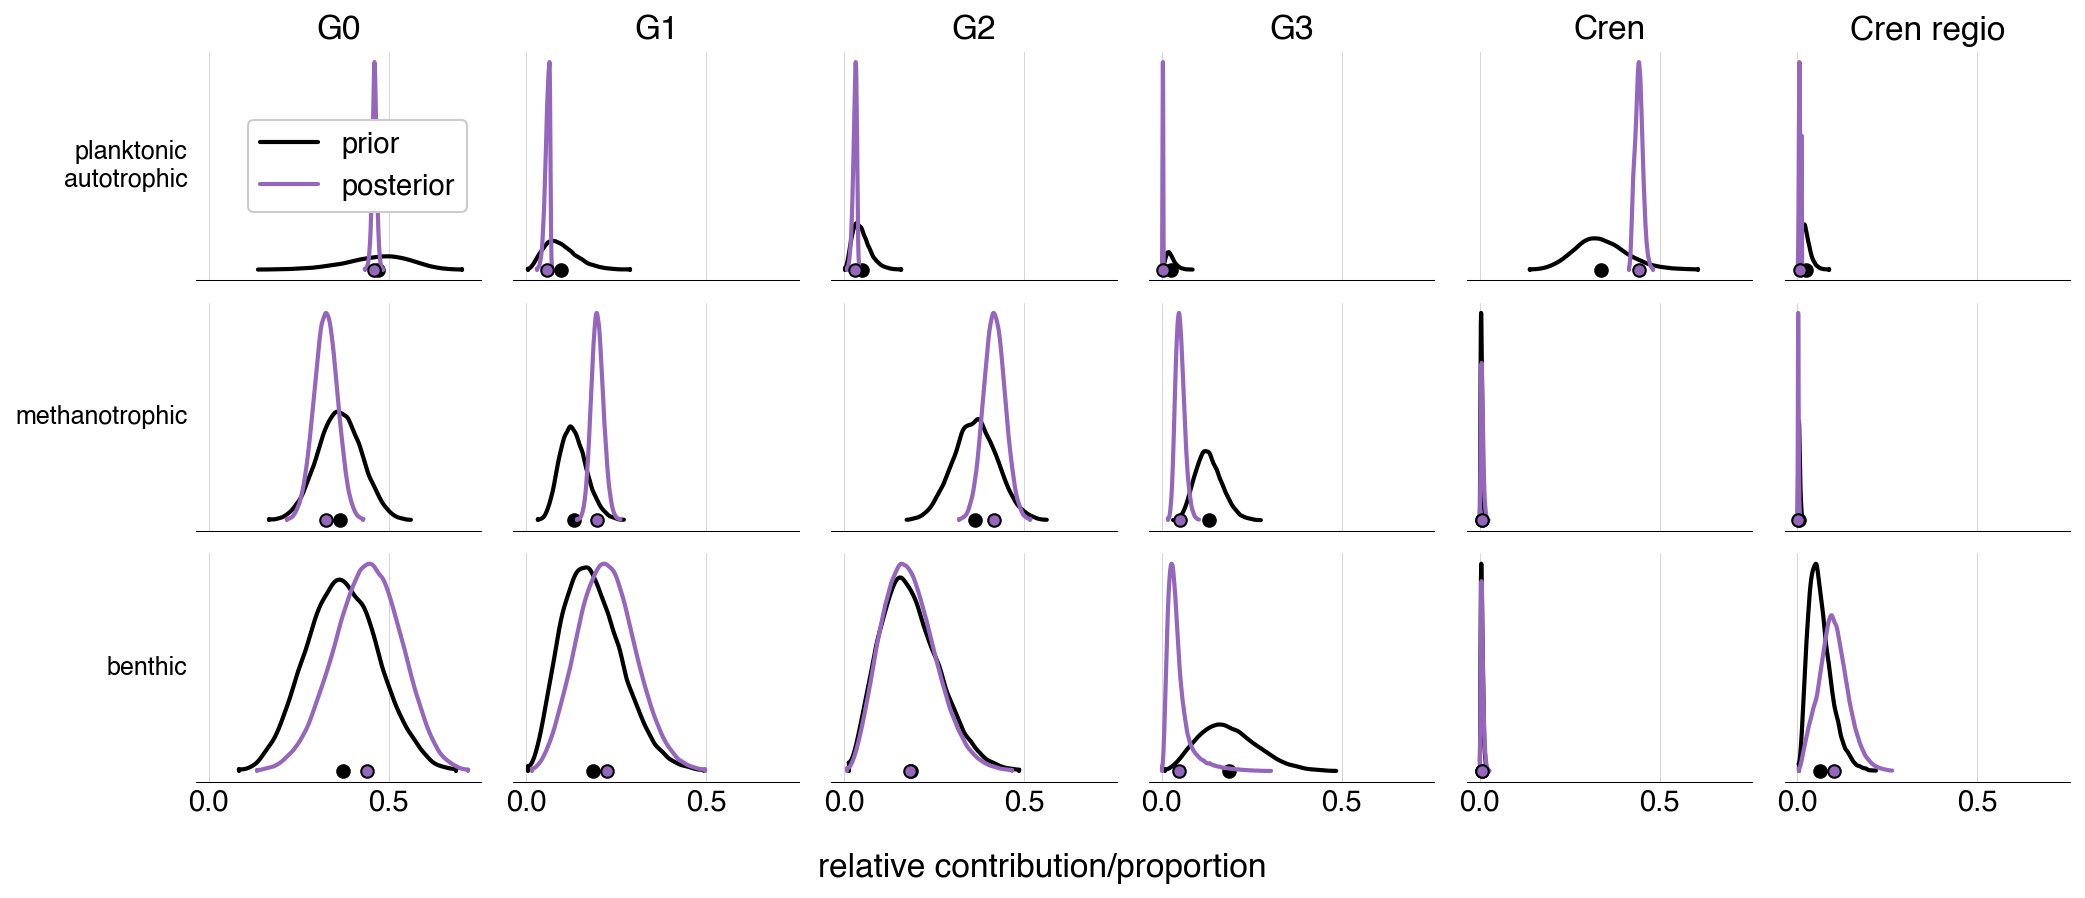

In [11]:
fig, axs = plt.subplots(3, 6, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["X"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, com in enumerate(communities):
    axs[i, 0].set_ylabel(
        com.replace("/", "\n"), rotation=0, va="center", ha="right", fontsize=12
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()

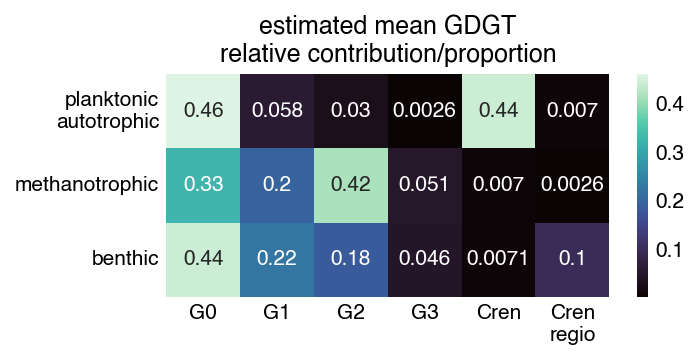

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.heatmap(post["X"].mean(dim=("chain", "draw")), annot=True, cmap="mako", ax=ax)
ax.set_yticklabels([com.replace("/", "\n") for com in communities], rotation=0)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs])
ax.set_title("estimated mean GDGT\nrelative contribution/proportion")
fig.tight_layout()

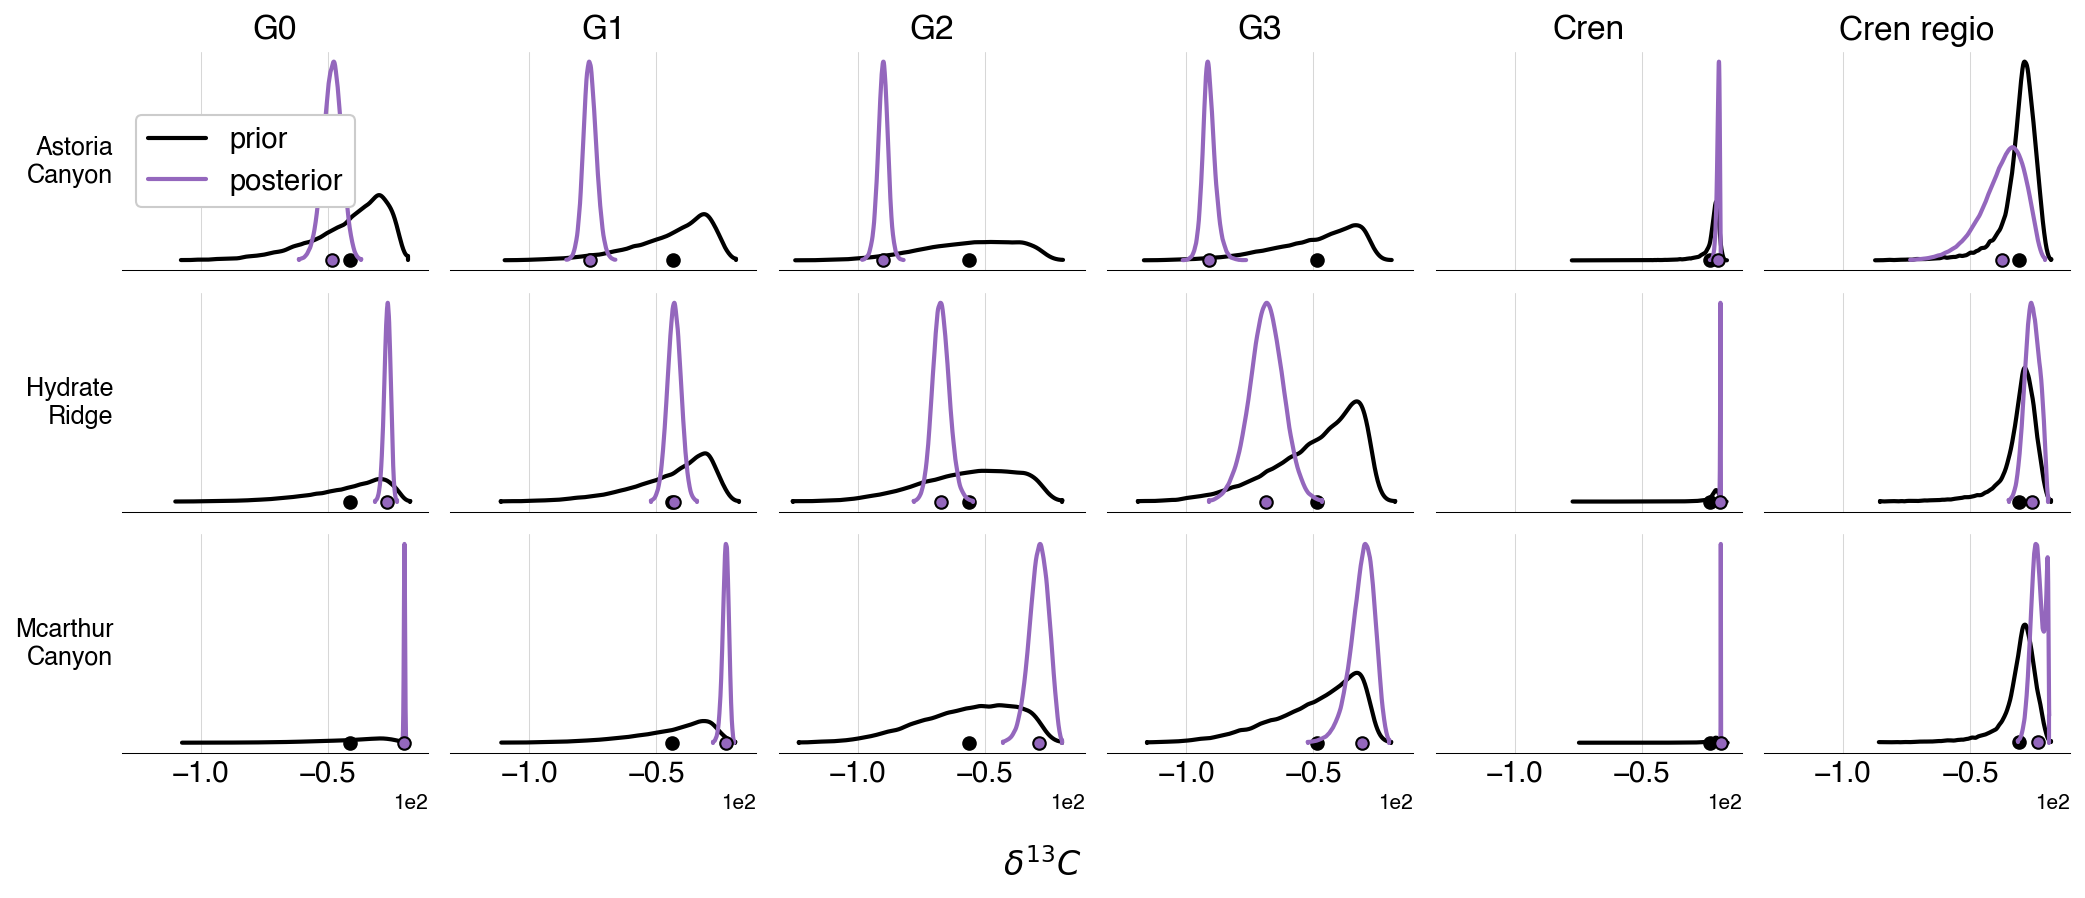

In [13]:
fig, axs = plt.subplots(3, 6, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["C"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, loc in enumerate(locations):
    axs[i, 0].set_ylabel(
        loc.replace(" ", "\n"), rotation=0, va="center", ha="right", fontsize=12
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()

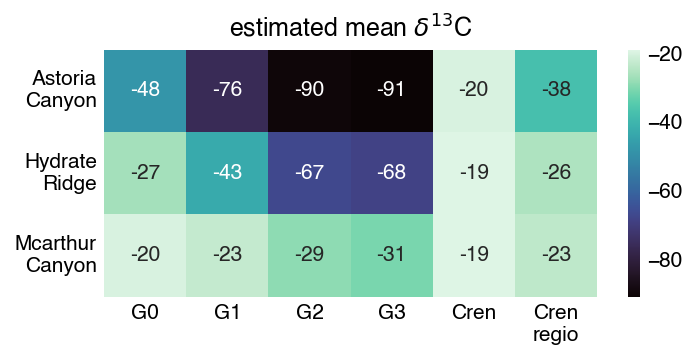

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.heatmap(post["C"].mean(dim=("chain", "draw")), annot=True, cmap="mako", ax=ax)
ax.set_yticklabels([loc.replace(" ", "\n") for loc in locations], rotation=0)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs])
ax.set_title("estimated mean $\delta ^{13}$C")
fig.tight_layout()

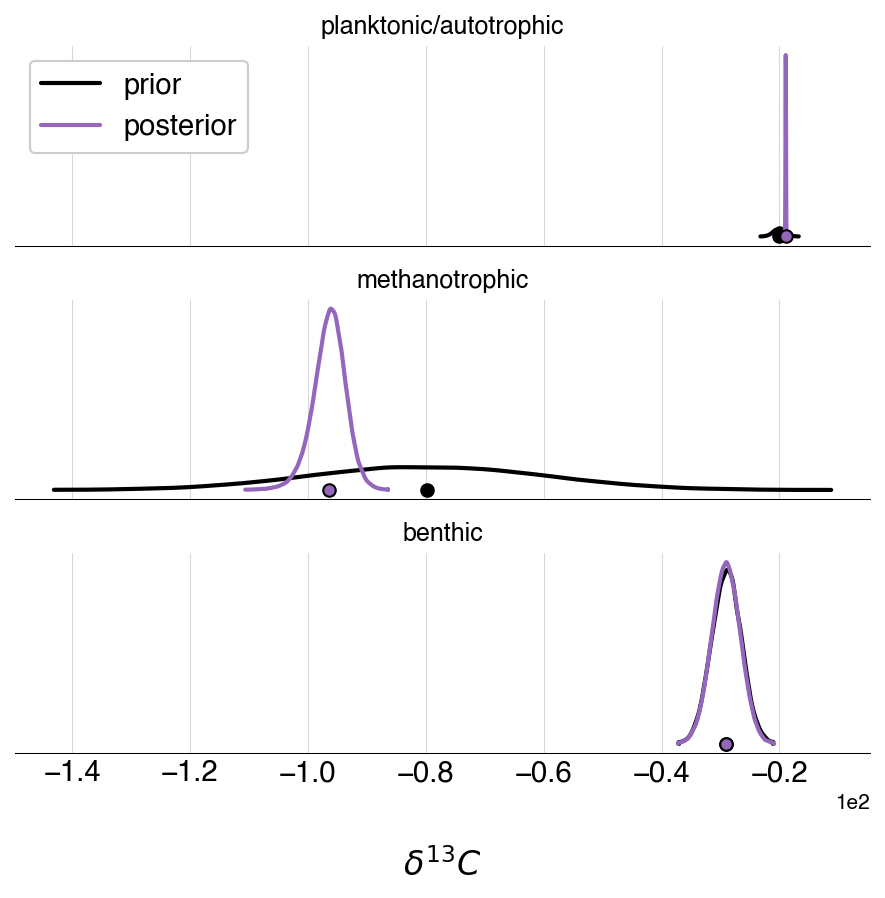

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["D"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(communities[i])
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()